In [0]:
from google.colab import files
files.upload()

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

In [0]:
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

In [0]:
!pip install -q kaggle
!pip install -q kaggle-cli

In [0]:
!kaggle datasets download uciml/pima-indians-diabetes-database

In [0]:
!unzip pima-indians-diabetes-database.zip
!rm "pima-indians-diabetes-database.zip"
!ls

# Linear Classifier

In [0]:
import pandas as pd
files.upload()

In [0]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [60]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [61]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [0]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [0]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [64]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [0]:
import tensorflow as tf

In [66]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [0]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [0]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [0]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size = 10)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

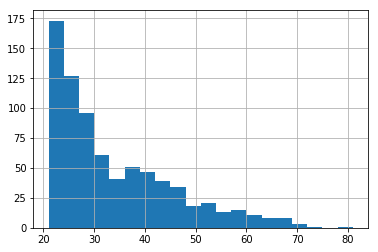

In [71]:
diabetes['Age'].hist(bins = 20)

In [0]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries = [20, 30, 40, 50, 60, 70, 80])

In [0]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, 
             diabetes_pedigree, assigned_group, age_bucket]

In [0]:
# Train Test Split

In [0]:
x_data = diabetes.drop('Class', axis = 1)

In [76]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [0]:
labels = diabetes['Class']

In [0]:
#labels

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels,
                                                    test_size = 0.3, random_state= 101)

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train,
                                                 batch_size = 10,
                                                 num_epochs = 1000,
                                                 shuffle = True)

In [82]:
model = tf.estimator.LinearClassifier(feature_columns= feat_cols, n_classes = 2)

W0716 15:15:33.206177 140378596730752 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpjhktvrqe


In [83]:
model.train(input_fn= input_func, steps = 1000)

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test,
                                                      batch_size = 10,
                                                      num_epochs = 1,
                                                      shuffle = False)

In [85]:
results = model.evaluate(eval_input_func)

W0716 15:15:41.504002 140378596730752 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0716 15:15:41.536742 140378596730752 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


In [86]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80090535,
 'auc_precision_recall': 0.63895476,
 'average_loss': 0.5268504,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0709352,
 'precision': 0.64705884,
 'prediction/mean': 0.37173253,
 'recall': 0.54320985}

In [0]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test,
                                                      batch_size = 10,
                                                      num_epochs = 1,
                                                      shuffle = False)

In [0]:
predictions = model.predict(pred_input_func)

In [0]:
my_pred = list(predictions)

# DNN

In [102]:
dnn_model = tf.estimator.DNNClassifier(hidden_units= [10, 20, 20, 20, 20, 10], 
                                       feature_columns= feat_cols,
                                       n_classes = 2)

W0716 15:16:35.585249 140378596730752 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpf7vbcdct


In [0]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, 
                                                        dimension = 4)

In [0]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, 
             diabetes_pedigree, embedded_group_col, age_bucket]

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train,
                                                 batch_size = 10,
                                                 num_epochs = 1000,
                                                 shuffle = True)

In [106]:
dnn_model.train(input_fn = input_func, steps = 1000)

In [0]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test,
                                                      batch_size = 10,
                                                      num_epochs = 1,
                                                      shuffle = False)

In [108]:
dnn_model.evaluate(eval_input_func)

W0716 15:16:49.347663 140378596730752 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0716 15:16:49.376585 140378596730752 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


{'accuracy': 0.75757575,
 'accuracy_baseline': 0.64935064,
 'auc': 0.81539094,
 'auc_precision_recall': 0.6809698,
 'average_loss': 0.52970654,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0984254,
 'precision': 0.7118644,
 'prediction/mean': 0.274412,
 'recall': 0.5185185}